# Sample application


In the following, the application of pycombina for solution of a combinatorial integral approximation problem is exemplified.


## Problem setup

A combinatorial integral approximation problem for a sample data set shall be solved. The setup includes ``n_c = 3`` mutually exclusive binary controls with each ``n_b = 149`` values and maximum switching constraints of ``sigma_max = [2, 2, 2]``, i. e. only two switching actions per control are allowed.

### Load sample data from file and visualize

The first column of the file ``sample_data.csv`` contains the time points, the other columns contain the relaxed binary values:

In [1]:
import numpy as np

data = np.loadtxt("sample_data.csv", skiprows = 1)

t = data[:,0]
b_rel = data[:-1,1:]

sigma_max = [2, 2, 2]

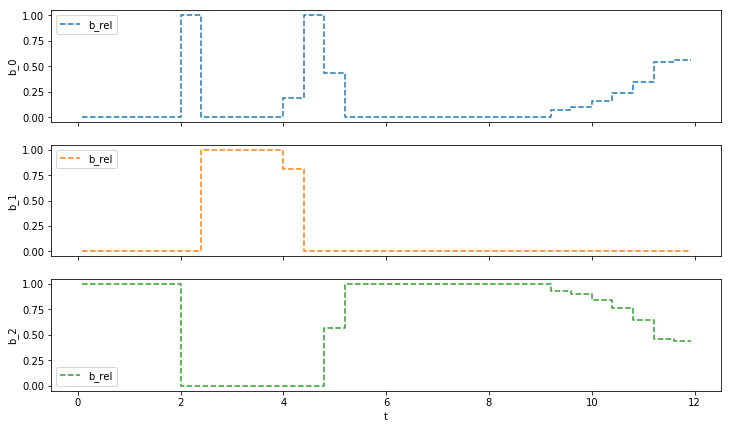

In [2]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.set_ylabel("b_0")
ax1.legend(loc = "upper left")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel",  color = "C1", linestyle="dashed", where = "post")
ax2.set_ylabel("b_1")
ax2.legend(loc = "upper left")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel",  color = "C2", linestyle="dashed", where = "post")
ax3.set_ylabel("b_2")
ax3.legend(loc = "lower left")
ax3.set_xlabel("t")
plt.show()

### Pass problem data to pycombina and check dimensions

For this, we instatiante an object of the class ``Combina``. This class contains the methods for solution of combinatorial integral approximation problems as well as some possibilities to check that the data we passed to pycombina was interpreted correctly. A welcome message is shown at the first start within a session.

In [3]:
from pycombina import Combina

combina = Combina(t, b_rel)

assert(combina.n_c == 3)
assert(combina.n_b == t.size-1)


-----------------------------------------------------------
|                                                         |
|                      You're using                       |
|                                                         |
|    pycombina -- Combinatorial Integral Approximation    |
|                                                         |
|       by A. Buerger, C. Zeile, S. Sager, M. Diehl       |
|                                                         |
-----------------------------------------------------------



### Solve combinatorial integral approximation problem

For solution of the problem, we choose the customized Branch-and-Bound method (``solver = "bnb"``), and pass the maximum switching constraints ``sigma_max``.

In [4]:
combina.solve(solver = "bnb", max_switches = sigma_max)


- Preparing data for Branch and Bound ...
  Preparation phase finished after  7e-06  s

- Initializing Branch and Bound queue ...
  Initialization finished after  6e-06  s

- Running Branch and Bound ...
  Solution with eta_max =  0.417175754574  at iteration  19699
  Branch and Bound finished after  0.038576  s

- Retrieving Branch and Bound solution ...
  Reconstructing the solution finished after  1.2e-05  s


The solution times showed above have been achieved on an Intel Core i5-4570 3.20 GHz CPU.

### Inspect and visualize solution

Retrieve the binary solution and the objective value.

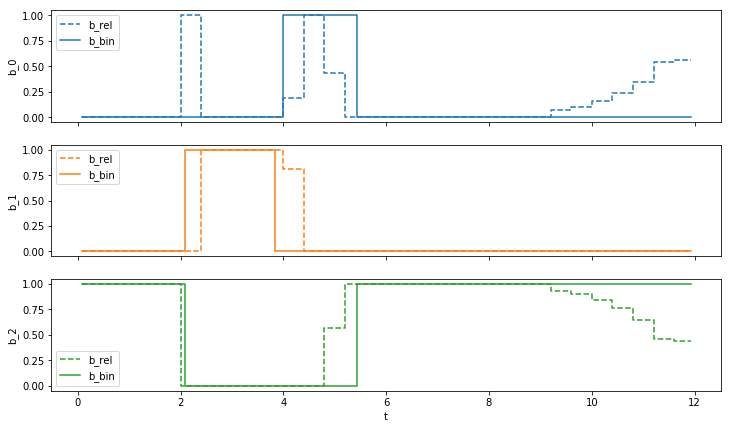

In [5]:
b_bin = combina.b_bin

f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.step(t[:-1], b_bin[0,:], label = "b_bin", color = "C0", where = "post")
ax1.legend(loc = "upper left")
ax1.set_ylabel("b_0")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel", color = "C1", linestyle="dashed", where = "post")
ax2.step(t[:-1], b_bin[1,:], label = "b_bin", color = "C1", where = "post")
ax2.legend(loc = "upper left")
ax2.set_ylabel("b_1")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel", color = "C2", linestyle="dashed", where = "post")
ax3.step(t[:-1], b_bin[2,:], label = "b_bin", color = "C2", where = "post")
ax3.legend(loc = "lower left")
ax3.set_ylabel("b_2")
ax3.set_xlabel("t")
plt.show()

Print the objective value.

In [6]:
print("Objective value: " + str(combina.eta))

Objective value: 0.417175754574
